In [1]:
import json
import pandas as pd
from augur.utils import json_to_tree
import seaborn as sns
import matplotlib.pyplot as plt
from Bio import SeqIO
tree_file = '../../../nextstrain-build/phylogenetic_subsampling/auspice/mers.json'

In [2]:
#read in the tree
with open(tree_file, 'r') as f:
    tree_json = json.load(f)
    

#put tree in Bio.phylo format
tree = json_to_tree(tree_json)
# store the mutations on each terminal branch leading to tips
muts_on_branch = {}

In [3]:
# iterate through terminal branches on the tree to find what mutations are there
for terminal in tree.find_clades(terminal=True): 
    host = terminal.node_attrs.get('host', {})
    host_name = host.get('value', {})
    date = terminal.node_attrs.get('num_date', {})
    date_value = date.get('value', {})

    muts_on_branch[terminal.name] = {'host': host_name, 'date': date_value}
    # get the mutations on this node from the 'branch_attrs'
    ### write code here
    muts = terminal.branch_attrs.get('mutations', {})
    for gene, mutations in muts.items():
        if gene != 'nuc':
            continue
        # Ensure the node and gene are initialized in the dictionary
        if terminal.name not in muts_on_branch:
            muts_on_branch[terminal.name] = {}
        if gene not in muts_on_branch[terminal.name]:
            muts_on_branch[terminal.name][gene] = mutations

In [4]:
genbank_file = "../../../nextstrain-build/phylogenetic_subsampling/defaults/mers_reference.gb"
gene_range = {}
for record in SeqIO.parse(genbank_file, "genbank"):
    for feature in record.features:
        if feature.type == "mat_peptide": 
            gene_name = feature.qualifiers.get("product", ["unknown"])[0]
            gene_name = gene_name.replace(' protein', "")
            gene_range[gene_name.lower()] = [int(feature.location.start), int(feature.location.end)]
        elif feature.type == "CDS":
            gene_name = feature.qualifiers.get("gene", ["unknown"])[0]
            if gene_name.lower() == "orf1ab" or gene_name.lower() == "s":
                continue
            gene_range[gene_name.lower()] = [int(feature.location.start), int(feature.location.end)]
gene_range['rdrp'] = gene_range.pop("rna-dependent rna polymerase")
gene_range['2Omethyltransferase'] = gene_range.pop("2'-o-methyltransferase")
gene_range["s1"] = [21513, 23708]
gene_range["s2"] = [23709, 25514]

    Gene Mutation   Host  Count
0   nsp1   A_to_T  Camel      0
1   nsp1   A_to_T  Human      0
2   nsp1   A_to_G  Camel     12
3   nsp1   A_to_G  Human      0
4   nsp1   A_to_C  Camel      0
5   nsp1   A_to_C  Human      0
6   nsp1   C_to_T  Camel     27
7   nsp1   C_to_T  Human      6
8   nsp1   C_to_A  Camel      1
9   nsp1   C_to_A  Human      0
10  nsp1   C_to_G  Camel      0
11  nsp1   C_to_G  Human      0
12  nsp1   G_to_A  Camel      9
13  nsp1   G_to_A  Human      1
14  nsp1   G_to_T  Camel      8
15  nsp1   G_to_T  Human      0
16  nsp1   G_to_C  Camel      0
17  nsp1   G_to_C  Human      1
18  nsp1   T_to_A  Camel      0
19  nsp1   T_to_A  Human      0
20  nsp1   T_to_G  Camel      1
21  nsp1   T_to_G  Human      1
22  nsp1   T_to_C  Camel      7
23  nsp1   T_to_C  Human      3


<Figure size 640x480 with 0 Axes>

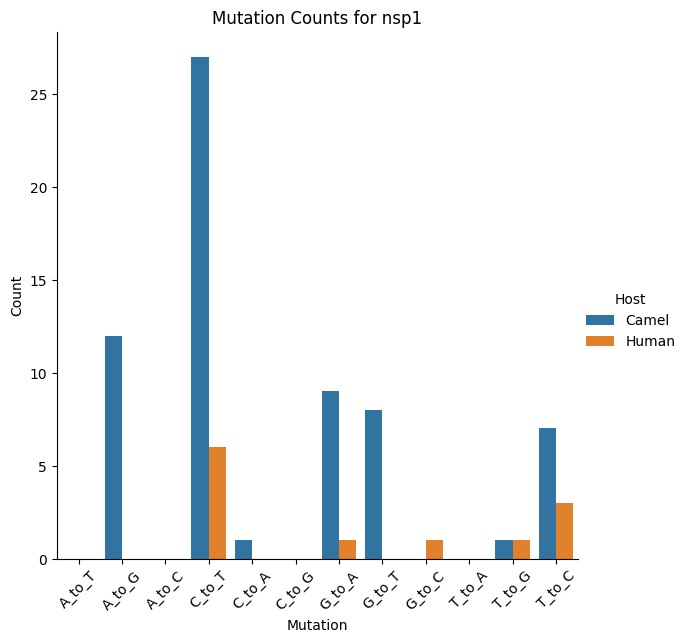

    Gene Mutation   Host  Count
24  nsp2   A_to_T  Camel      0
25  nsp2   A_to_T  Human      1
26  nsp2   A_to_G  Camel     18
27  nsp2   A_to_G  Human      5
28  nsp2   A_to_C  Camel      5
29  nsp2   A_to_C  Human      0
30  nsp2   C_to_T  Camel     73
31  nsp2   C_to_T  Human     19
32  nsp2   C_to_A  Camel      9
33  nsp2   C_to_A  Human      3
34  nsp2   C_to_G  Camel      0
35  nsp2   C_to_G  Human      1
36  nsp2   G_to_A  Camel     12
37  nsp2   G_to_A  Human      3
38  nsp2   G_to_T  Camel      4
39  nsp2   G_to_T  Human      0
40  nsp2   G_to_C  Camel      4
41  nsp2   G_to_C  Human      0
42  nsp2   T_to_A  Camel      4
43  nsp2   T_to_A  Human      1
44  nsp2   T_to_G  Camel      3
45  nsp2   T_to_G  Human      2
46  nsp2   T_to_C  Camel     30
47  nsp2   T_to_C  Human     12


<Figure size 640x480 with 0 Axes>

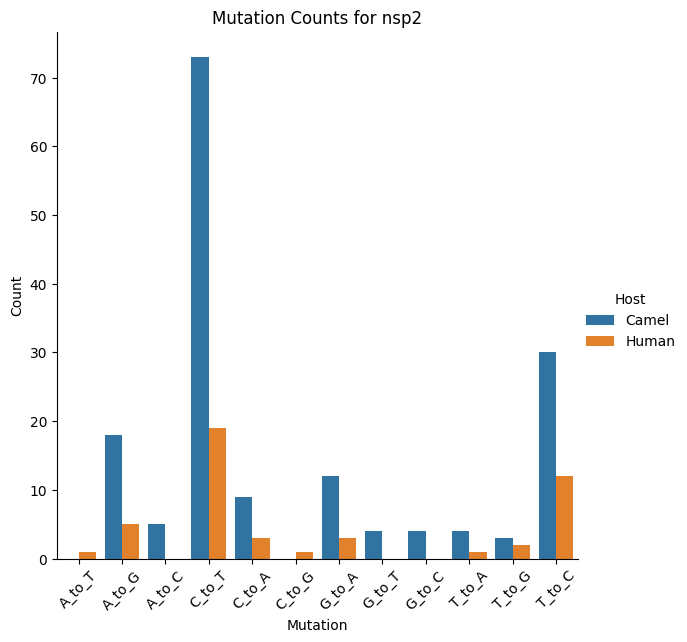

    Gene Mutation   Host  Count
48  nsp3   A_to_T  Camel      8
49  nsp3   A_to_T  Human      2
50  nsp3   A_to_G  Camel     32
51  nsp3   A_to_G  Human     18
52  nsp3   A_to_C  Camel     19
53  nsp3   A_to_C  Human      0
54  nsp3   C_to_T  Camel    147
55  nsp3   C_to_T  Human     46
56  nsp3   C_to_A  Camel     14
57  nsp3   C_to_A  Human      6
58  nsp3   C_to_G  Camel      1
59  nsp3   C_to_G  Human      1
60  nsp3   G_to_A  Camel     35
61  nsp3   G_to_A  Human     14
62  nsp3   G_to_T  Camel     22
63  nsp3   G_to_T  Human      9
64  nsp3   G_to_C  Camel      2
65  nsp3   G_to_C  Human      4
66  nsp3   T_to_A  Camel     12
67  nsp3   T_to_A  Human      4
68  nsp3   T_to_G  Camel     16
69  nsp3   T_to_G  Human      3
70  nsp3   T_to_C  Camel     90
71  nsp3   T_to_C  Human     20


<Figure size 640x480 with 0 Axes>

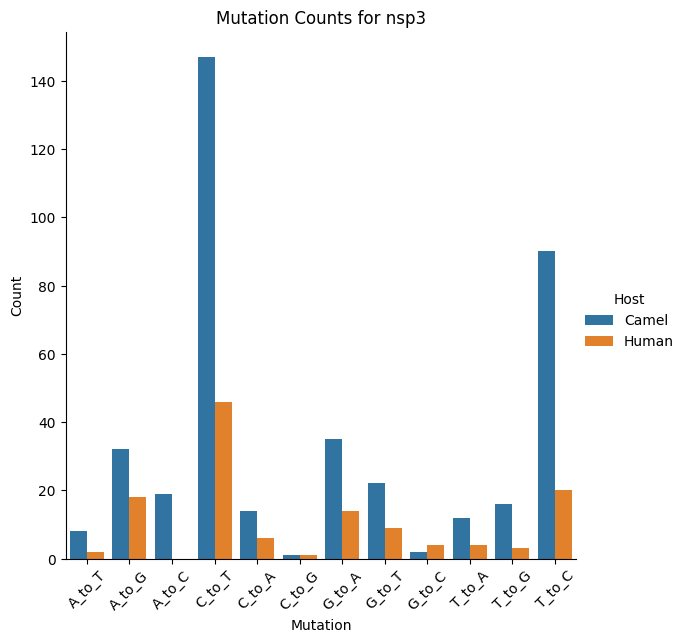

    Gene Mutation   Host  Count
72  nsp4   A_to_T  Camel      1
73  nsp4   A_to_T  Human      0
74  nsp4   A_to_G  Camel      9
75  nsp4   A_to_G  Human      2
76  nsp4   A_to_C  Camel      0
77  nsp4   A_to_C  Human      0
78  nsp4   C_to_T  Camel     25
79  nsp4   C_to_T  Human     10
80  nsp4   C_to_A  Camel      3
81  nsp4   C_to_A  Human      1
82  nsp4   C_to_G  Camel      0
83  nsp4   C_to_G  Human      0
84  nsp4   G_to_A  Camel     13
85  nsp4   G_to_A  Human      1
86  nsp4   G_to_T  Camel      4
87  nsp4   G_to_T  Human      4
88  nsp4   G_to_C  Camel      0
89  nsp4   G_to_C  Human      0
90  nsp4   T_to_A  Camel      0
91  nsp4   T_to_A  Human      0
92  nsp4   T_to_G  Camel      1
93  nsp4   T_to_G  Human      1
94  nsp4   T_to_C  Camel     20
95  nsp4   T_to_C  Human      1


<Figure size 640x480 with 0 Axes>

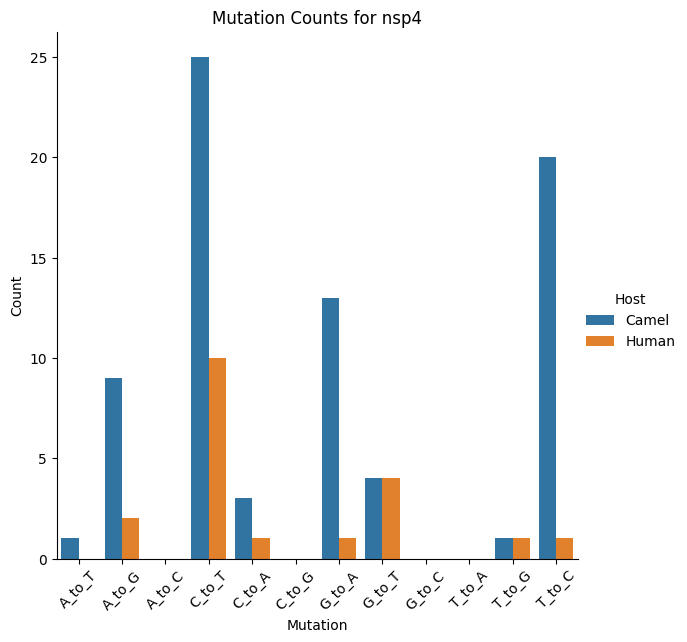

     Gene Mutation   Host  Count
96   nsp5   A_to_T  Camel      0
97   nsp5   A_to_T  Human      0
98   nsp5   A_to_G  Camel      2
99   nsp5   A_to_G  Human      0
100  nsp5   A_to_C  Camel      0
101  nsp5   A_to_C  Human      1
102  nsp5   C_to_T  Camel     11
103  nsp5   C_to_T  Human      6
104  nsp5   C_to_A  Camel      2
105  nsp5   C_to_A  Human      1
106  nsp5   C_to_G  Camel      0
107  nsp5   C_to_G  Human      0
108  nsp5   G_to_A  Camel      1
109  nsp5   G_to_A  Human      3
110  nsp5   G_to_T  Camel      1
111  nsp5   G_to_T  Human      0
112  nsp5   G_to_C  Camel      0
113  nsp5   G_to_C  Human      0
114  nsp5   T_to_A  Camel      0
115  nsp5   T_to_A  Human      0
116  nsp5   T_to_G  Camel      2
117  nsp5   T_to_G  Human      0
118  nsp5   T_to_C  Camel     11
119  nsp5   T_to_C  Human      2


<Figure size 640x480 with 0 Axes>

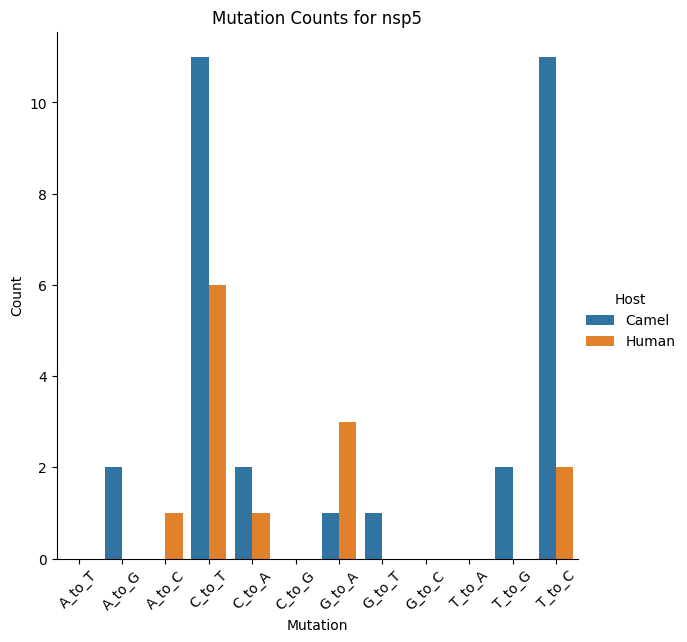

     Gene Mutation   Host  Count
120  nsp6   A_to_T  Camel      2
121  nsp6   A_to_T  Human      0
122  nsp6   A_to_G  Camel      3
123  nsp6   A_to_G  Human      2
124  nsp6   A_to_C  Camel      1
125  nsp6   A_to_C  Human      0
126  nsp6   C_to_T  Camel     22
127  nsp6   C_to_T  Human     16
128  nsp6   C_to_A  Camel      0
129  nsp6   C_to_A  Human      1
130  nsp6   C_to_G  Camel      0
131  nsp6   C_to_G  Human      0
132  nsp6   G_to_A  Camel      1
133  nsp6   G_to_A  Human      0
134  nsp6   G_to_T  Camel      2
135  nsp6   G_to_T  Human      0
136  nsp6   G_to_C  Camel      0
137  nsp6   G_to_C  Human      1
138  nsp6   T_to_A  Camel      1
139  nsp6   T_to_A  Human      0
140  nsp6   T_to_G  Camel      0
141  nsp6   T_to_G  Human      1
142  nsp6   T_to_C  Camel      5
143  nsp6   T_to_C  Human      3


<Figure size 640x480 with 0 Axes>

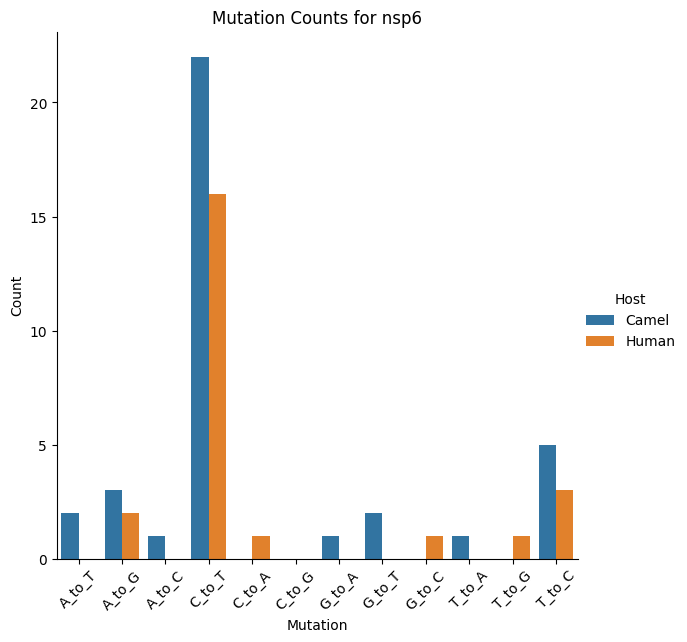

     Gene Mutation   Host  Count
144  nsp7   A_to_T  Camel      0
145  nsp7   A_to_T  Human      1
146  nsp7   A_to_G  Camel      0
147  nsp7   A_to_G  Human      0
148  nsp7   A_to_C  Camel      0
149  nsp7   A_to_C  Human      0
150  nsp7   C_to_T  Camel      6
151  nsp7   C_to_T  Human      1
152  nsp7   C_to_A  Camel      4
153  nsp7   C_to_A  Human      1
154  nsp7   C_to_G  Camel      0
155  nsp7   C_to_G  Human      0
156  nsp7   G_to_A  Camel      1
157  nsp7   G_to_A  Human      0
158  nsp7   G_to_T  Camel      0
159  nsp7   G_to_T  Human      0
160  nsp7   G_to_C  Camel      0
161  nsp7   G_to_C  Human      0
162  nsp7   T_to_A  Camel      0
163  nsp7   T_to_A  Human      0
164  nsp7   T_to_G  Camel      0
165  nsp7   T_to_G  Human      0
166  nsp7   T_to_C  Camel      6
167  nsp7   T_to_C  Human      0


<Figure size 640x480 with 0 Axes>

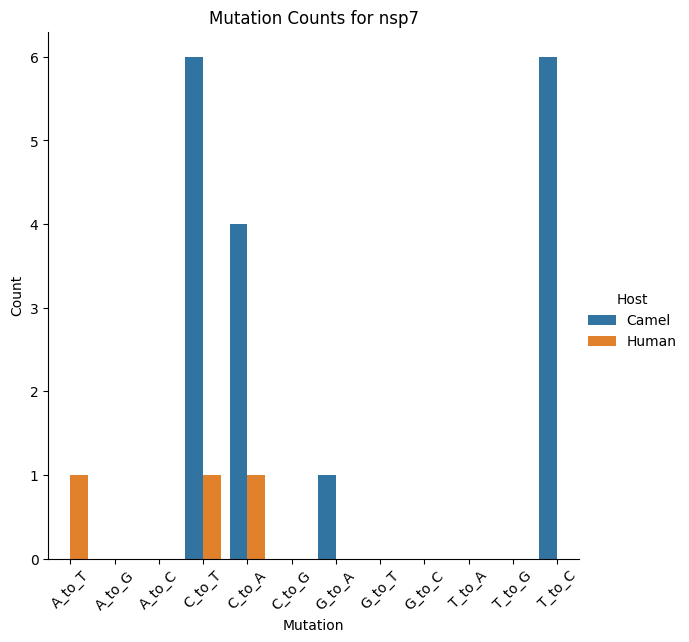

     Gene Mutation   Host  Count
168  nsp8   A_to_T  Camel      1
169  nsp8   A_to_T  Human      0
170  nsp8   A_to_G  Camel      2
171  nsp8   A_to_G  Human      1
172  nsp8   A_to_C  Camel      0
173  nsp8   A_to_C  Human      2
174  nsp8   C_to_T  Camel     18
175  nsp8   C_to_T  Human      1
176  nsp8   C_to_A  Camel      1
177  nsp8   C_to_A  Human      0
178  nsp8   C_to_G  Camel      1
179  nsp8   C_to_G  Human      0
180  nsp8   G_to_A  Camel      5
181  nsp8   G_to_A  Human      2
182  nsp8   G_to_T  Camel      1
183  nsp8   G_to_T  Human      1
184  nsp8   G_to_C  Camel      1
185  nsp8   G_to_C  Human      0
186  nsp8   T_to_A  Camel      0
187  nsp8   T_to_A  Human      1
188  nsp8   T_to_G  Camel      0
189  nsp8   T_to_G  Human      0
190  nsp8   T_to_C  Camel      8
191  nsp8   T_to_C  Human      3


<Figure size 640x480 with 0 Axes>

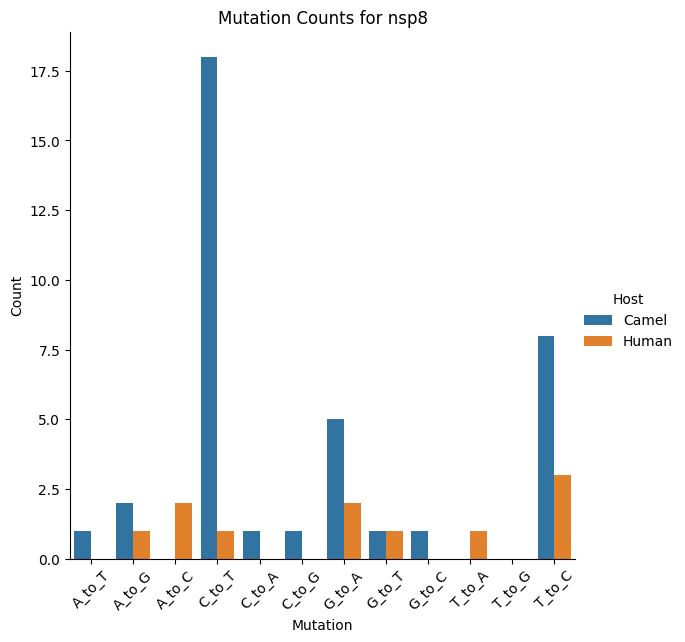

     Gene Mutation   Host  Count
192  nsp9   A_to_T  Camel      0
193  nsp9   A_to_T  Human      0
194  nsp9   A_to_G  Camel      2
195  nsp9   A_to_G  Human      2
196  nsp9   A_to_C  Camel      0
197  nsp9   A_to_C  Human      0
198  nsp9   C_to_T  Camel      1
199  nsp9   C_to_T  Human      0
200  nsp9   C_to_A  Camel      0
201  nsp9   C_to_A  Human      0
202  nsp9   C_to_G  Camel      0
203  nsp9   C_to_G  Human      0
204  nsp9   G_to_A  Camel      1
205  nsp9   G_to_A  Human      1
206  nsp9   G_to_T  Camel      1
207  nsp9   G_to_T  Human      2
208  nsp9   G_to_C  Camel      0
209  nsp9   G_to_C  Human      0
210  nsp9   T_to_A  Camel      1
211  nsp9   T_to_A  Human      1
212  nsp9   T_to_G  Camel      0
213  nsp9   T_to_G  Human      0
214  nsp9   T_to_C  Camel      5
215  nsp9   T_to_C  Human      0


<Figure size 640x480 with 0 Axes>

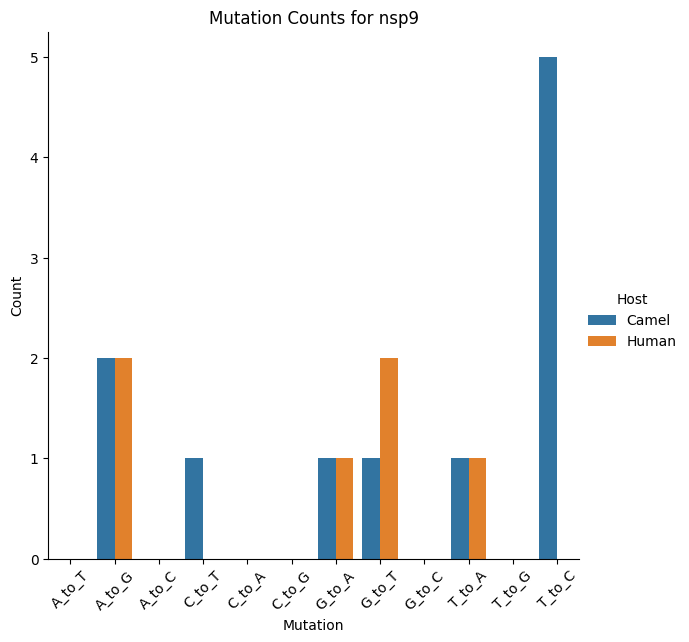

      Gene Mutation   Host  Count
216  nsp10   A_to_T  Camel      0
217  nsp10   A_to_T  Human      0
218  nsp10   A_to_G  Camel      0
219  nsp10   A_to_G  Human      0
220  nsp10   A_to_C  Camel      0
221  nsp10   A_to_C  Human      0
222  nsp10   C_to_T  Camel     12
223  nsp10   C_to_T  Human      4
224  nsp10   C_to_A  Camel      1
225  nsp10   C_to_A  Human      0
226  nsp10   C_to_G  Camel      0
227  nsp10   C_to_G  Human      0
228  nsp10   G_to_A  Camel      1
229  nsp10   G_to_A  Human      0
230  nsp10   G_to_T  Camel      0
231  nsp10   G_to_T  Human      0
232  nsp10   G_to_C  Camel      0
233  nsp10   G_to_C  Human      0
234  nsp10   T_to_A  Camel      0
235  nsp10   T_to_A  Human      0
236  nsp10   T_to_G  Camel      0
237  nsp10   T_to_G  Human      0
238  nsp10   T_to_C  Camel     10
239  nsp10   T_to_C  Human      1


<Figure size 640x480 with 0 Axes>

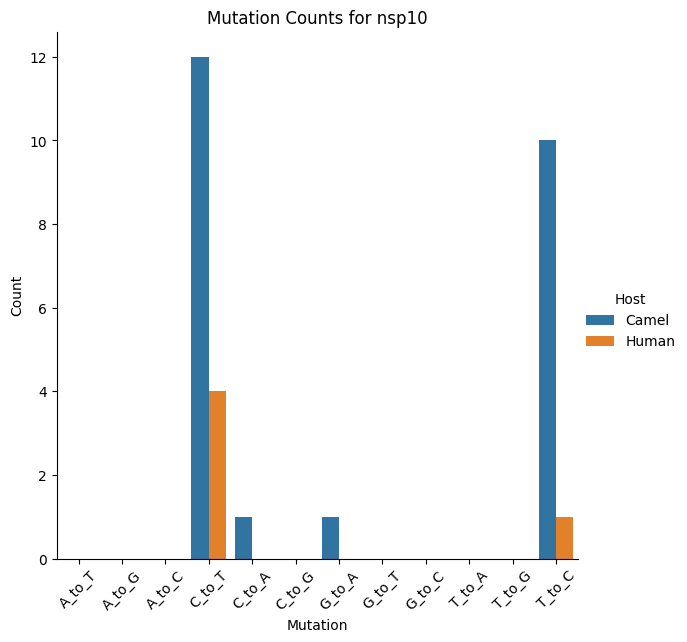

    Gene Mutation   Host  Count
240  hel   A_to_T  Camel      0
241  hel   A_to_T  Human      1
242  hel   A_to_G  Camel      3
243  hel   A_to_G  Human      0
244  hel   A_to_C  Camel      3
245  hel   A_to_C  Human      0
246  hel   C_to_T  Camel     41
247  hel   C_to_T  Human     11
248  hel   C_to_A  Camel      1
249  hel   C_to_A  Human      0
250  hel   C_to_G  Camel      1
251  hel   C_to_G  Human      0
252  hel   G_to_A  Camel      9
253  hel   G_to_A  Human      0
254  hel   G_to_T  Camel      5
255  hel   G_to_T  Human     10
256  hel   G_to_C  Camel      0
257  hel   G_to_C  Human      0
258  hel   T_to_A  Camel      1
259  hel   T_to_A  Human      0
260  hel   T_to_G  Camel      1
261  hel   T_to_G  Human      1
262  hel   T_to_C  Camel     27
263  hel   T_to_C  Human      5


<Figure size 640x480 with 0 Axes>

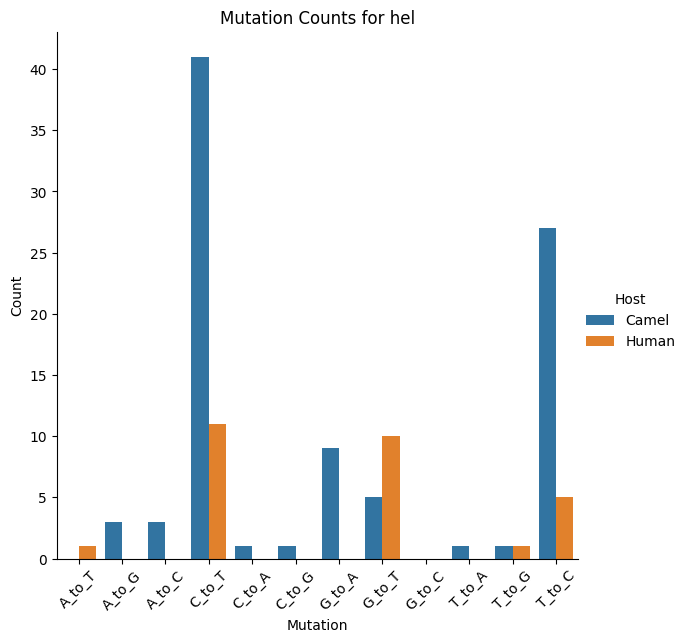

     Gene Mutation   Host  Count
264  exon   A_to_T  Camel      0
265  exon   A_to_T  Human      2
266  exon   A_to_G  Camel     30
267  exon   A_to_G  Human      5
268  exon   A_to_C  Camel      1
269  exon   A_to_C  Human      1
270  exon   C_to_T  Camel     24
271  exon   C_to_T  Human     10
272  exon   C_to_A  Camel      1
273  exon   C_to_A  Human      2
274  exon   C_to_G  Camel      0
275  exon   C_to_G  Human      0
276  exon   G_to_A  Camel     25
277  exon   G_to_A  Human      5
278  exon   G_to_T  Camel     15
279  exon   G_to_T  Human      2
280  exon   G_to_C  Camel      1
281  exon   G_to_C  Human      0
282  exon   T_to_A  Camel      2
283  exon   T_to_A  Human      0
284  exon   T_to_G  Camel      3
285  exon   T_to_G  Human      2
286  exon   T_to_C  Camel     22
287  exon   T_to_C  Human      4


<Figure size 640x480 with 0 Axes>

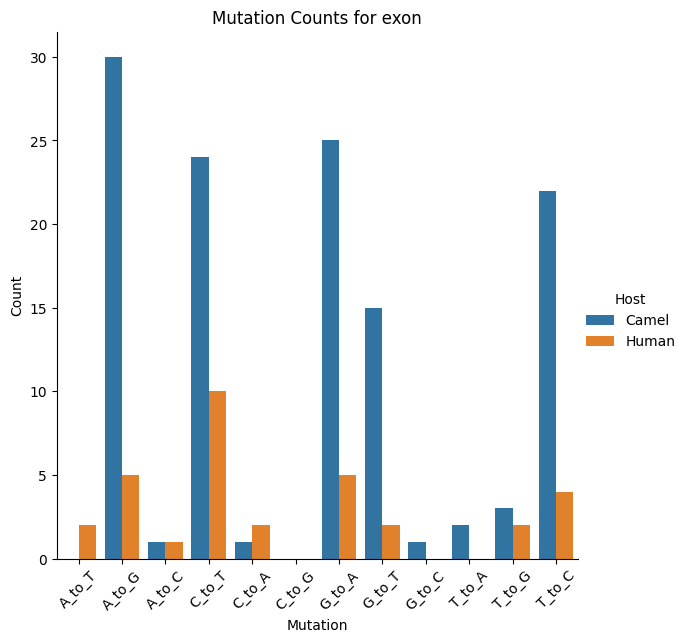

       Gene Mutation   Host  Count
288  nendou   A_to_T  Camel      3
289  nendou   A_to_T  Human      0
290  nendou   A_to_G  Camel     11
291  nendou   A_to_G  Human      1
292  nendou   A_to_C  Camel      0
293  nendou   A_to_C  Human      0
294  nendou   C_to_T  Camel     34
295  nendou   C_to_T  Human      7
296  nendou   C_to_A  Camel      1
297  nendou   C_to_A  Human      1
298  nendou   C_to_G  Camel      0
299  nendou   C_to_G  Human      0
300  nendou   G_to_A  Camel      9
301  nendou   G_to_A  Human      0
302  nendou   G_to_T  Camel     31
303  nendou   G_to_T  Human      4
304  nendou   G_to_C  Camel      2
305  nendou   G_to_C  Human      0
306  nendou   T_to_A  Camel      2
307  nendou   T_to_A  Human      0
308  nendou   T_to_G  Camel      8
309  nendou   T_to_G  Human      1
310  nendou   T_to_C  Camel     14
311  nendou   T_to_C  Human      2


<Figure size 640x480 with 0 Axes>

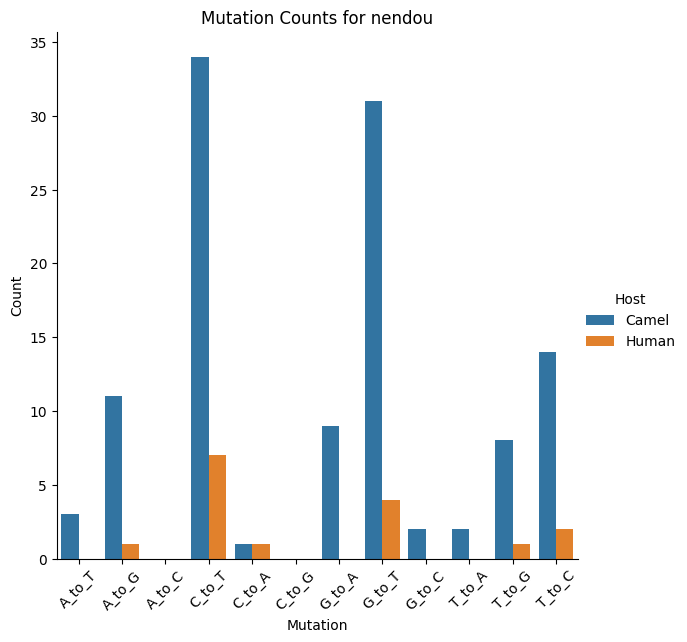

     Gene Mutation   Host  Count
336  orf3   A_to_T  Camel      7
337  orf3   A_to_T  Human      0
338  orf3   A_to_G  Camel      0
339  orf3   A_to_G  Human      0
340  orf3   A_to_C  Camel      0
341  orf3   A_to_C  Human      1
342  orf3   C_to_T  Camel     33
343  orf3   C_to_T  Human      6
344  orf3   C_to_A  Camel      1
345  orf3   C_to_A  Human      0
346  orf3   C_to_G  Camel      1
347  orf3   C_to_G  Human      0
348  orf3   G_to_A  Camel      5
349  orf3   G_to_A  Human      2
350  orf3   G_to_T  Camel      6
351  orf3   G_to_T  Human      5
352  orf3   G_to_C  Camel      0
353  orf3   G_to_C  Human      1
354  orf3   T_to_A  Camel      4
355  orf3   T_to_A  Human      0
356  orf3   T_to_G  Camel      3
357  orf3   T_to_G  Human      0
358  orf3   T_to_C  Camel     32
359  orf3   T_to_C  Human      1


<Figure size 640x480 with 0 Axes>

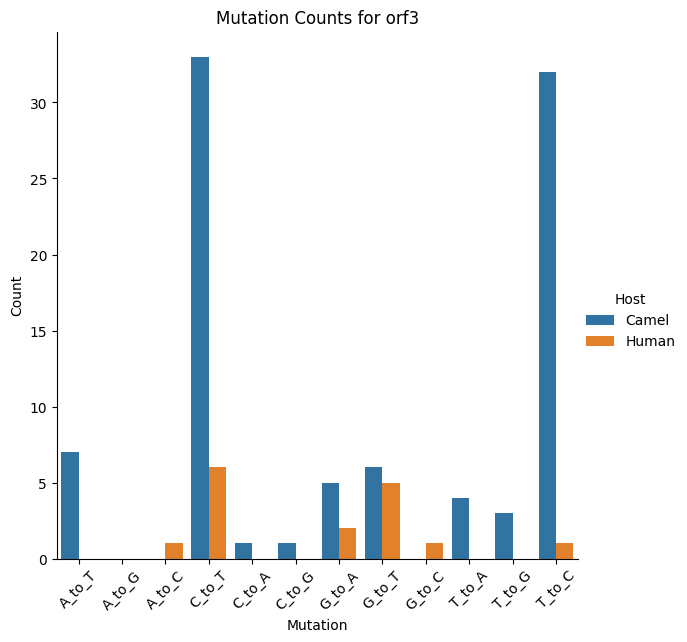

      Gene Mutation   Host  Count
360  orf4a   A_to_T  Camel      0
361  orf4a   A_to_T  Human      0
362  orf4a   A_to_G  Camel      0
363  orf4a   A_to_G  Human      0
364  orf4a   A_to_C  Camel      0
365  orf4a   A_to_C  Human      1
366  orf4a   C_to_T  Camel     23
367  orf4a   C_to_T  Human      7
368  orf4a   C_to_A  Camel      0
369  orf4a   C_to_A  Human      0
370  orf4a   C_to_G  Camel      6
371  orf4a   C_to_G  Human      1
372  orf4a   G_to_A  Camel      0
373  orf4a   G_to_A  Human      0
374  orf4a   G_to_T  Camel      2
375  orf4a   G_to_T  Human      2
376  orf4a   G_to_C  Camel      7
377  orf4a   G_to_C  Human      2
378  orf4a   T_to_A  Camel      0
379  orf4a   T_to_A  Human      0
380  orf4a   T_to_G  Camel      3
381  orf4a   T_to_G  Human      0
382  orf4a   T_to_C  Camel     21
383  orf4a   T_to_C  Human      0


<Figure size 640x480 with 0 Axes>

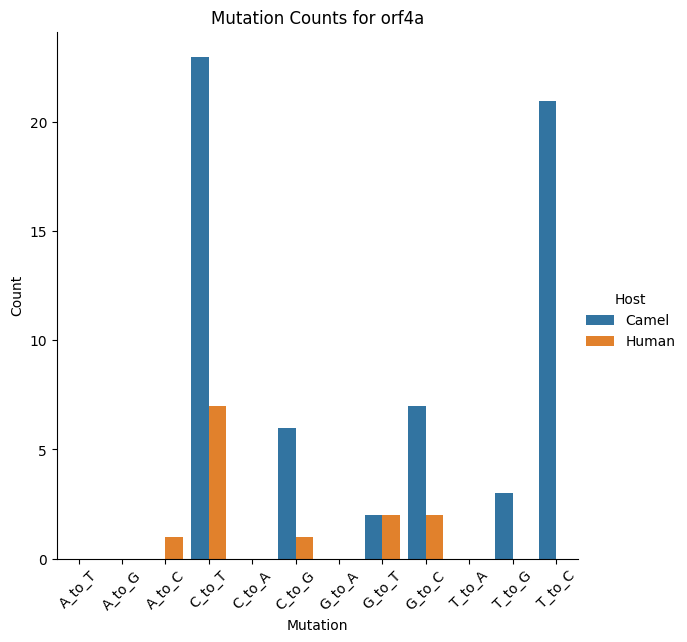

      Gene Mutation   Host  Count
384  orf4b   A_to_T  Camel      1
385  orf4b   A_to_T  Human      4
386  orf4b   A_to_G  Camel      1
387  orf4b   A_to_G  Human      0
388  orf4b   A_to_C  Camel      1
389  orf4b   A_to_C  Human      1
390  orf4b   C_to_T  Camel     27
391  orf4b   C_to_T  Human      5
392  orf4b   C_to_A  Camel      2
393  orf4b   C_to_A  Human      0
394  orf4b   C_to_G  Camel      6
395  orf4b   C_to_G  Human      1
396  orf4b   G_to_A  Camel      3
397  orf4b   G_to_A  Human      0
398  orf4b   G_to_T  Camel      7
399  orf4b   G_to_T  Human      2
400  orf4b   G_to_C  Camel      8
401  orf4b   G_to_C  Human      2
402  orf4b   T_to_A  Camel      0
403  orf4b   T_to_A  Human      0
404  orf4b   T_to_G  Camel      2
405  orf4b   T_to_G  Human      1
406  orf4b   T_to_C  Camel     29
407  orf4b   T_to_C  Human      1


<Figure size 640x480 with 0 Axes>

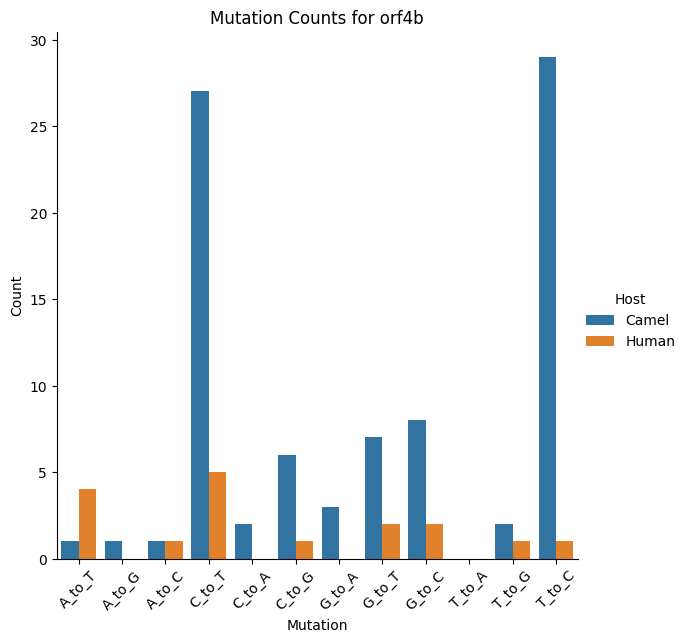

     Gene Mutation   Host  Count
408  orf5   A_to_T  Camel      4
409  orf5   A_to_T  Human      0
410  orf5   A_to_G  Camel      2
411  orf5   A_to_G  Human      2
412  orf5   A_to_C  Camel      7
413  orf5   A_to_C  Human      1
414  orf5   C_to_T  Camel     24
415  orf5   C_to_T  Human      9
416  orf5   C_to_A  Camel      6
417  orf5   C_to_A  Human      0
418  orf5   C_to_G  Camel      1
419  orf5   C_to_G  Human      0
420  orf5   G_to_A  Camel      1
421  orf5   G_to_A  Human      0
422  orf5   G_to_T  Camel     10
423  orf5   G_to_T  Human      2
424  orf5   G_to_C  Camel      3
425  orf5   G_to_C  Human      0
426  orf5   T_to_A  Camel      4
427  orf5   T_to_A  Human      0
428  orf5   T_to_G  Camel      4
429  orf5   T_to_G  Human      0
430  orf5   T_to_C  Camel     19
431  orf5   T_to_C  Human      4


<Figure size 640x480 with 0 Axes>

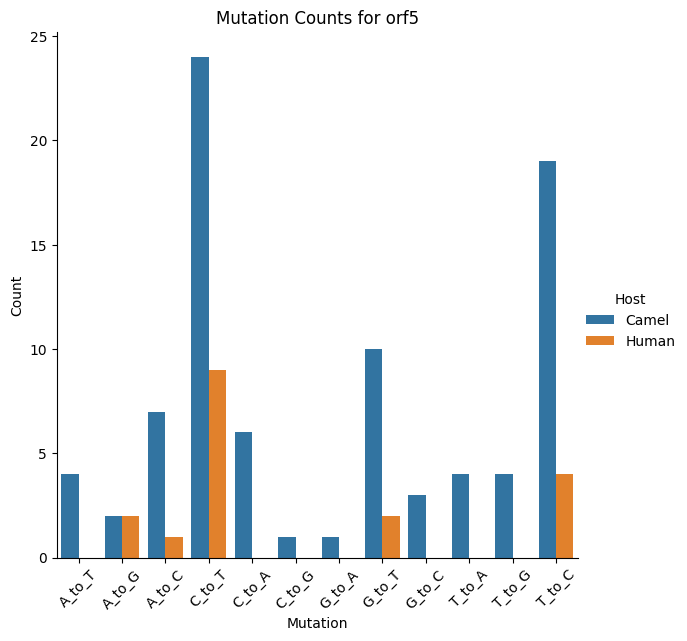

    Gene Mutation   Host  Count
432    e   A_to_T  Camel      0
433    e   A_to_T  Human      0
434    e   A_to_G  Camel      0
435    e   A_to_G  Human      0
436    e   A_to_C  Camel      0
437    e   A_to_C  Human      0
438    e   C_to_T  Camel      1
439    e   C_to_T  Human      2
440    e   C_to_A  Camel      0
441    e   C_to_A  Human      0
442    e   C_to_G  Camel      0
443    e   C_to_G  Human      0
444    e   G_to_A  Camel      2
445    e   G_to_A  Human      0
446    e   G_to_T  Camel      9
447    e   G_to_T  Human      0
448    e   G_to_C  Camel      2
449    e   G_to_C  Human      0
450    e   T_to_A  Camel      0
451    e   T_to_A  Human      0
452    e   T_to_G  Camel      2
453    e   T_to_G  Human      0
454    e   T_to_C  Camel      0
455    e   T_to_C  Human      0


<Figure size 640x480 with 0 Axes>

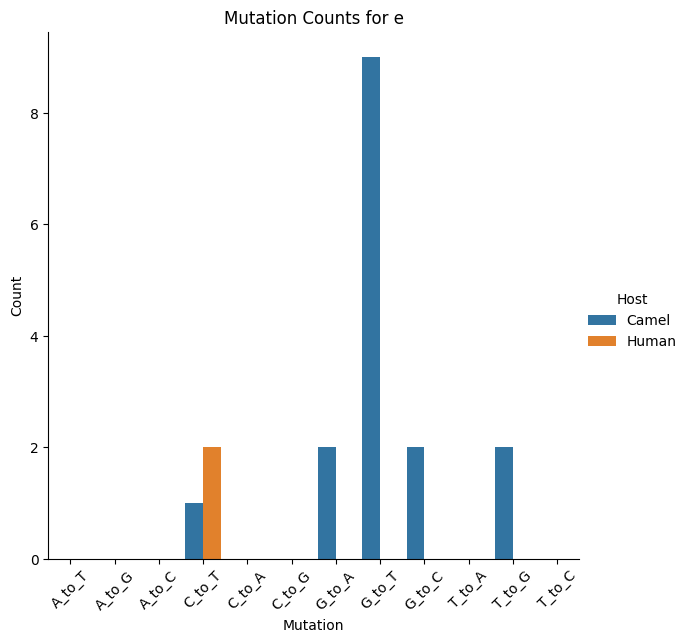

    Gene Mutation   Host  Count
456    m   A_to_T  Camel      9
457    m   A_to_T  Human      1
458    m   A_to_G  Camel      6
459    m   A_to_G  Human      1
460    m   A_to_C  Camel      0
461    m   A_to_C  Human      0
462    m   C_to_T  Camel     18
463    m   C_to_T  Human      7
464    m   C_to_A  Camel      3
465    m   C_to_A  Human      0
466    m   C_to_G  Camel      1
467    m   C_to_G  Human      0
468    m   G_to_A  Camel      4
469    m   G_to_A  Human      2
470    m   G_to_T  Camel      7
471    m   G_to_T  Human      2
472    m   G_to_C  Camel      1
473    m   G_to_C  Human      1
474    m   T_to_A  Camel      5
475    m   T_to_A  Human      0
476    m   T_to_G  Camel      2
477    m   T_to_G  Human      1
478    m   T_to_C  Camel      8
479    m   T_to_C  Human      0


<Figure size 640x480 with 0 Axes>

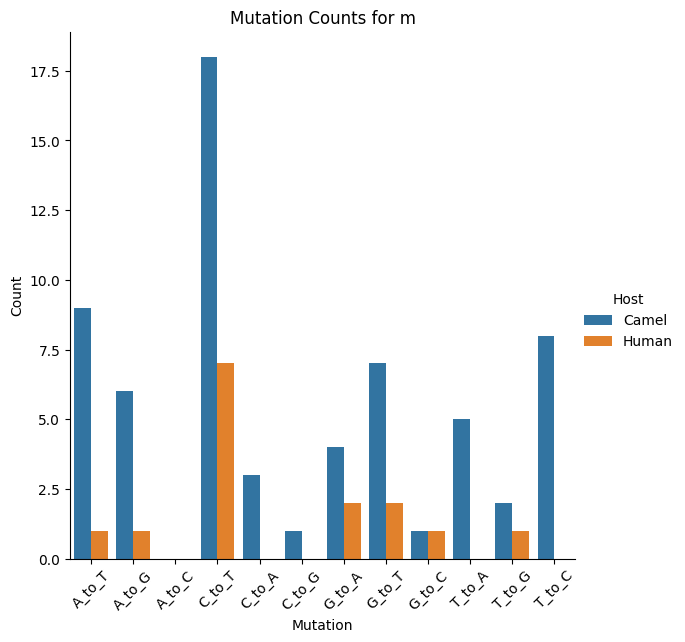

    Gene Mutation   Host  Count
480    n   A_to_T  Camel      4
481    n   A_to_T  Human      0
482    n   A_to_G  Camel      6
483    n   A_to_G  Human      5
484    n   A_to_C  Camel      0
485    n   A_to_C  Human      1
486    n   C_to_T  Camel     29
487    n   C_to_T  Human      8
488    n   C_to_A  Camel      3
489    n   C_to_A  Human      1
490    n   C_to_G  Camel      2
491    n   C_to_G  Human      1
492    n   G_to_A  Camel     11
493    n   G_to_A  Human      2
494    n   G_to_T  Camel     21
495    n   G_to_T  Human      5
496    n   G_to_C  Camel      8
497    n   G_to_C  Human      2
498    n   T_to_A  Camel      9
499    n   T_to_A  Human      0
500    n   T_to_G  Camel      3
501    n   T_to_G  Human      2
502    n   T_to_C  Camel     17
503    n   T_to_C  Human      6


<Figure size 640x480 with 0 Axes>

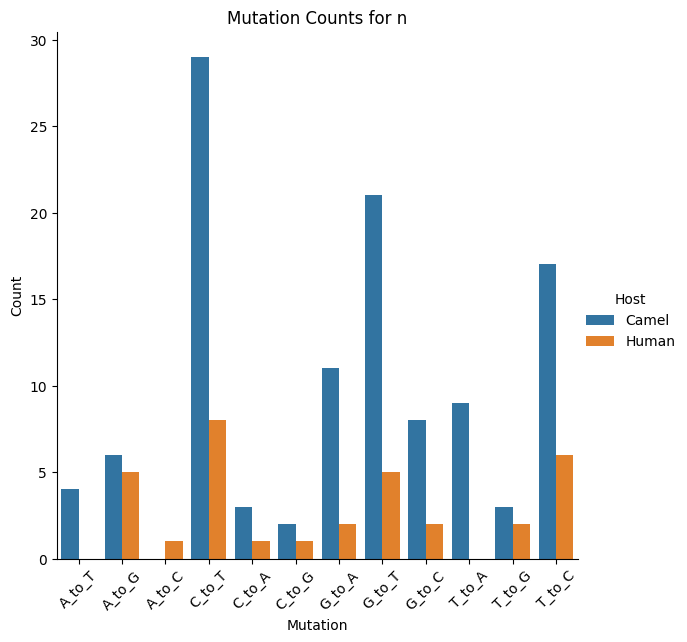

      Gene Mutation   Host  Count
504  orf8b   A_to_T  Camel      0
505  orf8b   A_to_T  Human      0
506  orf8b   A_to_G  Camel      1
507  orf8b   A_to_G  Human      0
508  orf8b   A_to_C  Camel      0
509  orf8b   A_to_C  Human      0
510  orf8b   C_to_T  Camel     11
511  orf8b   C_to_T  Human      4
512  orf8b   C_to_A  Camel      2
513  orf8b   C_to_A  Human      0
514  orf8b   C_to_G  Camel      0
515  orf8b   C_to_G  Human      0
516  orf8b   G_to_A  Camel      3
517  orf8b   G_to_A  Human      0
518  orf8b   G_to_T  Camel      5
519  orf8b   G_to_T  Human      0
520  orf8b   G_to_C  Camel      3
521  orf8b   G_to_C  Human      1
522  orf8b   T_to_A  Camel      0
523  orf8b   T_to_A  Human      0
524  orf8b   T_to_G  Camel      1
525  orf8b   T_to_G  Human      0
526  orf8b   T_to_C  Camel      5
527  orf8b   T_to_C  Human      1


<Figure size 640x480 with 0 Axes>

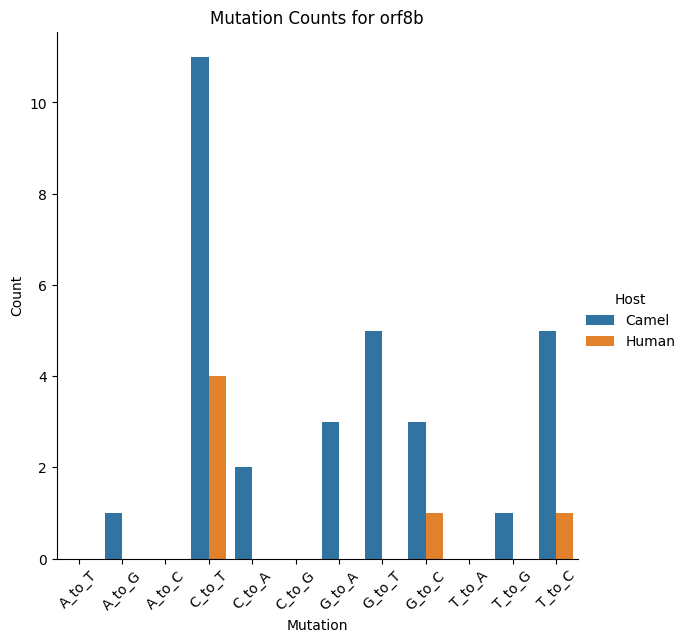

     Gene Mutation   Host  Count
528  rdrp   A_to_T  Camel      1
529  rdrp   A_to_T  Human      0
530  rdrp   A_to_G  Camel      5
531  rdrp   A_to_G  Human      4
532  rdrp   A_to_C  Camel      0
533  rdrp   A_to_C  Human      3
534  rdrp   C_to_T  Camel     49
535  rdrp   C_to_T  Human     14
536  rdrp   C_to_A  Camel      4
537  rdrp   C_to_A  Human      0
538  rdrp   C_to_G  Camel      0
539  rdrp   C_to_G  Human      0
540  rdrp   G_to_A  Camel     16
541  rdrp   G_to_A  Human      4
542  rdrp   G_to_T  Camel     11
543  rdrp   G_to_T  Human      0
544  rdrp   G_to_C  Camel      0
545  rdrp   G_to_C  Human      0
546  rdrp   T_to_A  Camel      2
547  rdrp   T_to_A  Human      2
548  rdrp   T_to_G  Camel      8
549  rdrp   T_to_G  Human      3
550  rdrp   T_to_C  Camel     33
551  rdrp   T_to_C  Human     12


<Figure size 640x480 with 0 Axes>

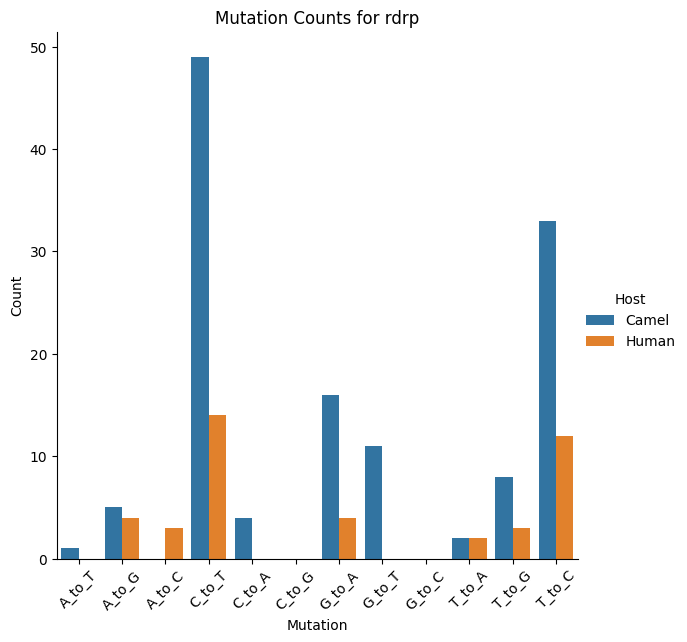

                    Gene Mutation   Host  Count
552  2Omethyltransferase   A_to_T  Camel      0
553  2Omethyltransferase   A_to_T  Human      0
554  2Omethyltransferase   A_to_G  Camel      4
555  2Omethyltransferase   A_to_G  Human      0
556  2Omethyltransferase   A_to_C  Camel      6
557  2Omethyltransferase   A_to_C  Human      0
558  2Omethyltransferase   C_to_T  Camel      6
559  2Omethyltransferase   C_to_T  Human      6
560  2Omethyltransferase   C_to_A  Camel      3
561  2Omethyltransferase   C_to_A  Human      1
562  2Omethyltransferase   C_to_G  Camel      0
563  2Omethyltransferase   C_to_G  Human      0
564  2Omethyltransferase   G_to_A  Camel      2
565  2Omethyltransferase   G_to_A  Human      0
566  2Omethyltransferase   G_to_T  Camel      1
567  2Omethyltransferase   G_to_T  Human      2
568  2Omethyltransferase   G_to_C  Camel      0
569  2Omethyltransferase   G_to_C  Human      0
570  2Omethyltransferase   T_to_A  Camel      0
571  2Omethyltransferase   T_to_A  Human

<Figure size 640x480 with 0 Axes>

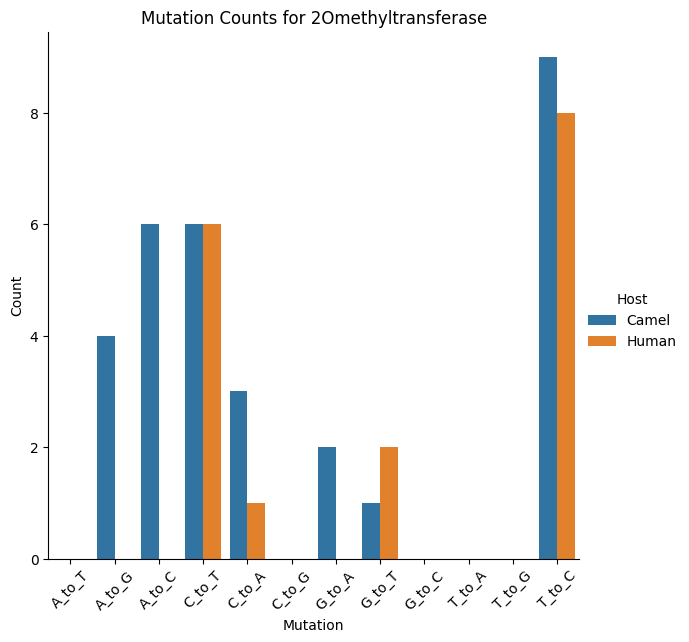

    Gene Mutation   Host  Count
576   s1   A_to_T  Camel      7
577   s1   A_to_T  Human      4
578   s1   A_to_G  Camel      8
579   s1   A_to_G  Human      8
580   s1   A_to_C  Camel      1
581   s1   A_to_C  Human      0
582   s1   C_to_T  Camel    101
583   s1   C_to_T  Human     22
584   s1   C_to_A  Camel      6
585   s1   C_to_A  Human      3
586   s1   C_to_G  Camel      5
587   s1   C_to_G  Human      3
588   s1   G_to_A  Camel     10
589   s1   G_to_A  Human      9
590   s1   G_to_T  Camel     21
591   s1   G_to_T  Human      8
592   s1   G_to_C  Camel      3
593   s1   G_to_C  Human      4
594   s1   T_to_A  Camel      3
595   s1   T_to_A  Human      1
596   s1   T_to_G  Camel      4
597   s1   T_to_G  Human      0
598   s1   T_to_C  Camel     82
599   s1   T_to_C  Human     17


<Figure size 640x480 with 0 Axes>

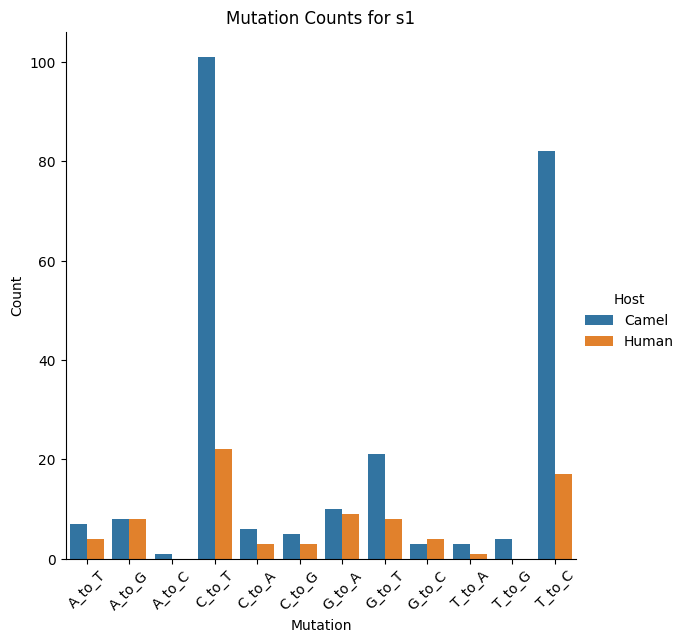

    Gene Mutation   Host  Count
600   s2   A_to_T  Camel      2
601   s2   A_to_T  Human      1
602   s2   A_to_G  Camel      5
603   s2   A_to_G  Human      5
604   s2   A_to_C  Camel      0
605   s2   A_to_C  Human      0
606   s2   C_to_T  Camel     70
607   s2   C_to_T  Human     20
608   s2   C_to_A  Camel      4
609   s2   C_to_A  Human      2
610   s2   C_to_G  Camel      2
611   s2   C_to_G  Human      2
612   s2   G_to_A  Camel     10
613   s2   G_to_A  Human      6
614   s2   G_to_T  Camel     18
615   s2   G_to_T  Human      9
616   s2   G_to_C  Camel      5
617   s2   G_to_C  Human      2
618   s2   T_to_A  Camel      0
619   s2   T_to_A  Human      0
620   s2   T_to_G  Camel      7
621   s2   T_to_G  Human      1
622   s2   T_to_C  Camel     36
623   s2   T_to_C  Human      6


<Figure size 640x480 with 0 Axes>

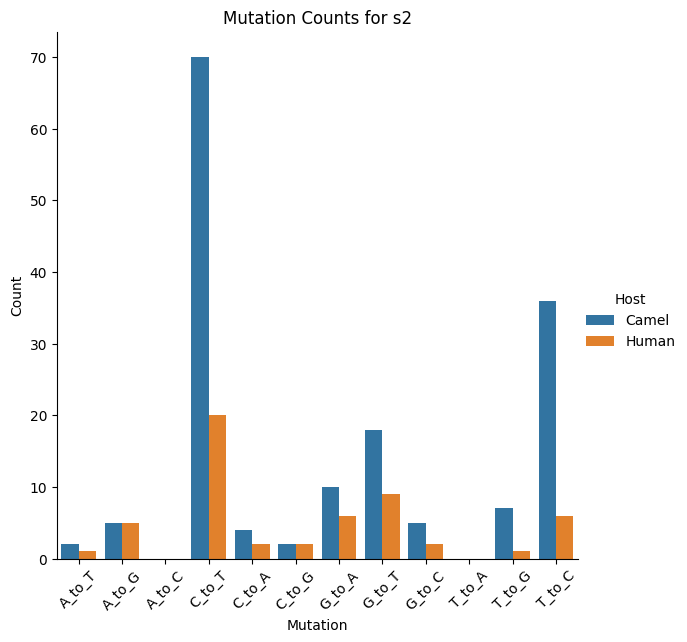

In [5]:
gene_mut_counts = {}

# Function to create a fresh dictionary for mutation counts
def create_mut_counts():
    return {
        'A_to_T': {'Camel': 0, 'Human': 0}, 'A_to_G': {'Camel': 0, 'Human': 0}, 'A_to_C': {'Camel': 0, 'Human': 0},
        'C_to_T': {'Camel': 0, 'Human': 0}, 'C_to_A': {'Camel': 0, 'Human': 0}, 'C_to_G': {'Camel': 0, 'Human': 0},
        'G_to_A': {'Camel': 0, 'Human': 0}, 'G_to_T': {'Camel': 0, 'Human': 0}, 'G_to_C': {'Camel': 0, 'Human': 0},
        'T_to_A': {'Camel': 0, 'Human': 0}, 'T_to_G': {'Camel': 0, 'Human': 0}, "T_to_C": {'Camel': 0, 'Human': 0}
}


for sample, info in muts_on_branch.items():
    host = info['host']
    if host == 'Bat' or host == 'Llama':
        continue
    nuc = info.get('nuc', {})

    for gene, [start, end] in gene_range.items():
        if gene not in gene_mut_counts:
            gene_mut_counts[gene] = create_mut_counts()  # Use a fresh dictionary for each gene
        for mut in nuc:
            if start <= int(mut[1:-1]) <= end:
                key = f"{mut[0]}_to_{mut[-1]}"
                if key in gene_mut_counts[gene]:
                    if host == 'Human':
                        gene_mut_counts[gene][key]['Human'] += 1
                    elif host == 'Camel':
                        gene_mut_counts[gene][key]['Camel'] += 1

data = []

for gene, mutations in gene_mut_counts.items():
    for mutation, counts in mutations.items():
        row = {
            'Gene': gene,
            'Mutation': mutation,
            'Host': 'Camel',
            'Count': counts['Camel'],
        }
        data.append(row)
        row = {
            'Gene': gene,
            'Mutation': mutation,
            'Host': 'Human',
            'Count': counts['Human'],
        }
        data.append(row)

df = pd.DataFrame(data)
nuc_mutations_by_gene = df.to_csv('../../intermediate-results-downsampling/nuc_mutations_by_gene.csv')

for gene in gene_range.keys():
    if gene == 'nsp11':
        continue
    df_gene = df.query("Gene == @gene")
    print(df_gene)

    # Use seaborn to create the grouped bar plot
    plt.figure()
    sns.catplot(
        x='Mutation', y='Count', hue='Host', data=df_gene,
        kind='bar', height=6
    )

    # Customize the plot
    plt.title(f'Mutation Counts for {gene}')
    plt.xlabel('Mutation')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

    # Show the plot for the current gene
    plt.show()
